In [156]:
#import libraries to be used
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [157]:
#import cleaned crash and weather data
crash = pd.read_csv('/Users/samuelclark/Documents/UMBC Data Science /Introduction to Data Science/Final Project/Data/Crashes_in_DC_cleaned.csv')
weather = pd.read_csv('/Users/samuelclark/Documents/UMBC Data Science /Introduction to Data Science/Final Project/Data/Weather_Cleaned_Data(2015-2019).csv')
volume = pd.read_csv('/Users/samuelclark/Documents/UMBC Data Science /Introduction to Data Science/Final Project/Data/2016to2018_Traffic_Volume.csv')

In [158]:
#looking at shape data to see how many rows and columns i should expect
#in the new data set. 128758 rows and 22 columns
crash_shape = crash.shape
weather_shape = weather.shape

print('the crash data has', crash_shape,'rows and columns')
print('the weather data has',weather_shape,'rows and columns')

the crash data has (128758, 6) rows and columns
the weather data has (1831, 16) rows and columns


In [160]:
#Removes timezone and strips the time of dat from the crash REPORTDATE
#column to prepared for the merge
crash['REPORTDATE'] = pd.to_datetime(crash['REPORTDATE'])
crash['REPORTDATE'] = crash['REPORTDATE'].dt.tz_convert(None)
crash['REPORTDATE'] = crash['REPORTDATE'].dt.strftime('%Y-%m-%d')
crash['REPORTDATE'] = pd.to_datetime(crash['REPORTDATE'])

crash.dtypes

REPORTDATE    datetime64[ns]
CrashCount             int64
Hour                   int64
Day                    int64
Month                  int64
Year                   int64
dtype: object

In [161]:
#need to convert date time column in the weather DF so it can merge
weather['Date time'] = pd.to_datetime(weather['Date time'])
weather.dtypes

Date time              datetime64[ns]
Maximum Temperature           float64
Minimum Temperature           float64
Temperature                   float64
Wind Chill                    float64
Heat Index                    float64
Precipitation                 float64
Snow                          float64
Snow Depth                    float64
Wind Speed                    float64
Wind Direction                float64
Wind Gust                     float64
Visibility                    float64
Cloud Cover                   float64
Relative Humidity             float64
Conditions                     object
dtype: object

In [162]:
#merging the files on the date
merged = pd.merge(crash, weather, how = 'inner', 
                  left_on = crash['REPORTDATE'],
                  right_on = weather['Date time'])
print(merged.shape)
print(merged.columns)
print(merged.dtypes)

(129145, 23)
Index(['key_0', 'REPORTDATE', 'CrashCount', 'Hour', 'Day', 'Month', 'Year',
       'Date time', 'Maximum Temperature', 'Minimum Temperature',
       'Temperature', 'Wind Chill', 'Heat Index', 'Precipitation', 'Snow',
       'Snow Depth', 'Wind Speed', 'Wind Direction', 'Wind Gust', 'Visibility',
       'Cloud Cover', 'Relative Humidity', 'Conditions'],
      dtype='object')
key_0                  datetime64[ns]
REPORTDATE             datetime64[ns]
CrashCount                      int64
Hour                            int64
Day                             int64
Month                           int64
Year                            int64
Date time              datetime64[ns]
Maximum Temperature           float64
Minimum Temperature           float64
Temperature                   float64
Wind Chill                    float64
Heat Index                    float64
Precipitation                 float64
Snow                          float64
Snow Depth                    float64
Wi

In [163]:
#checking the merge
merged.loc[merged['REPORTDATE'] != merged['Date time']]

Empty DataFrame
Columns: [key_0, REPORTDATE, CrashCount, Hour, Day, Month, Year, Date time, Maximum Temperature, Minimum Temperature, Temperature, Wind Chill, Heat Index, Precipitation, Snow, Snow Depth, Wind Speed, Wind Direction, Wind Gust, Visibility, Cloud Cover, Relative Humidity, Conditions]
Index: []

[0 rows x 23 columns]

In [164]:
#drop and rename columns
merged = merged.drop(columns = ['Date time'])
merged = merged.rename(columns={'Maximum Temperature':'Maximum_Temperature', 'Minimum Temperature':'Minimum_Temperature', 
                                'Wind Chill':'Wind_Chill', 'Heat Index':'Heat_Index','Snow Depth':'Snow_Depth', 
                                'Wind Speed':'Wind_Speed', 'Wind Direction':'Wind_Direction', 'Wind Gust':'Wind_Gust',
                                'Cloud Cover':'Cloud_Cover', 'Relative Humidity':'Relative_Humidity'})
merged.columns

Index(['key_0', 'REPORTDATE', 'CrashCount', 'Hour', 'Day', 'Month', 'Year',
       'Maximum_Temperature', 'Minimum_Temperature', 'Temperature',
       'Wind_Chill', 'Heat_Index', 'Precipitation', 'Snow', 'Snow_Depth',
       'Wind_Speed', 'Wind_Direction', 'Wind_Gust', 'Visibility',
       'Cloud_Cover', 'Relative_Humidity', 'Conditions'],
      dtype='object')

In [171]:
#grouping by date 
merged2 = merged.groupby(['Hour', 'Day', 'Month', 'Year'], as_index=False).agg(
{
    'CrashCount':'sum',
    'Maximum_Temperature':'mean',
    'Temperature':'mean',
    'Wind_Chill':'mean',
    'Heat_Index':'mean',
    'Precipitation':'mean',
    'Snow':'mean',
    'Snow_Depth':'mean',
    'Wind_Speed':'mean',
    'Wind_Direction':'mean',
    'Wind_Gust':'mean',
    'Visibility':'mean',
    'Cloud_Cover':'mean',
    'Relative_Humidity':'mean',
    'Heat_Index':'mean'
})
print(merged2.dtypes)
print(merged2.shape)
merged2

Hour                     int64
Day                      int64
Month                    int64
Year                     int64
CrashCount               int64
Maximum_Temperature    float64
Temperature            float64
Wind_Chill             float64
Heat_Index             float64
Precipitation          float64
Snow                   float64
Snow_Depth             float64
Wind_Speed             float64
Wind_Direction         float64
Wind_Gust              float64
Visibility             float64
Cloud_Cover            float64
Relative_Humidity      float64
dtype: object
(34803, 18)


Hour  Day  Month  Year  CrashCount  Maximum_Temperature  Temperature  \
0         0    1      1  2016           3                 46.0         42.1   
1         0    1      1  2017           3                 55.0         46.0   
2         0    1      1  2018           3                 23.9         18.4   
3         0    1      1  2019           5                 63.9         56.5   
4         0    1      2  2017           4                 50.4         42.5   
...     ...  ...    ...   ...         ...                  ...          ...   
34798    23   31     12  2015           2                 46.0         42.4   
34799    23   31     12  2016           2                 48.6         39.4   
34800    23   31     12  2017           1                 23.9         18.5   
34801    23   31     12  2018           9                 50.0         44.6   
34802    23   31     12  2019           3                 53.9         47.5   

       Wind_Chill  Heat_Index  Precipitation  Snow  Snow_Depth  Wind_Speed  \
0            31.3         0.0           0.00   0.0         0.0        12.4   
1            36.4         0.0           0.00   0.0         0.0        12.7   
2             0.7         0.0           0.00   0.0         0.0        19.2   
3            43.9         0.0           0.17   0.0         0.0        18.7   
4            27.7         0.0           0.00   0.0         0.0        10.6   
...           ...         ...            ...   ...         ...         ...   
34798        31.3         0.0           0.00   0.0         0.0        12.4   
34799        22.4         0.0           0.00   0.0         0.0        25.5   
34800         0.7         0.0           0.00   0.0         0.0        19.2   
34801        34.4         0.0           0.54   0.0         0.0         7.0   
34802        39.2         0.0           0.00   0.0         0.0        15.3   

       Wind_Direction  Wind_Gust  Visibility  Cloud_Cover  Relative_Humidity  
0              314.29        0.0         9.9         73.4              57.83  
1              142.17       24.2         9.9         60.5              51.82  
2              315.63       26.4         9.9         24.8              47.15  
3              283.17       29.5         9.2         69.0              68.71  
4              194.83        0.0         9.9         66.7              65.43  
...               ...        ...         ...          ...                ...  
34798          319.46        0.0         9.9         76.4              58.19  
34799          205.63       34.0         9.9         64.7              50.19  
34800          318.67       26.4         9.9         23.8              47.52  
34801           74.17        0.0         6.2         95.1              86.63  
34802          202.67       23.0         8.7         83.2              70.02  

[34803 rows x 18 columns]

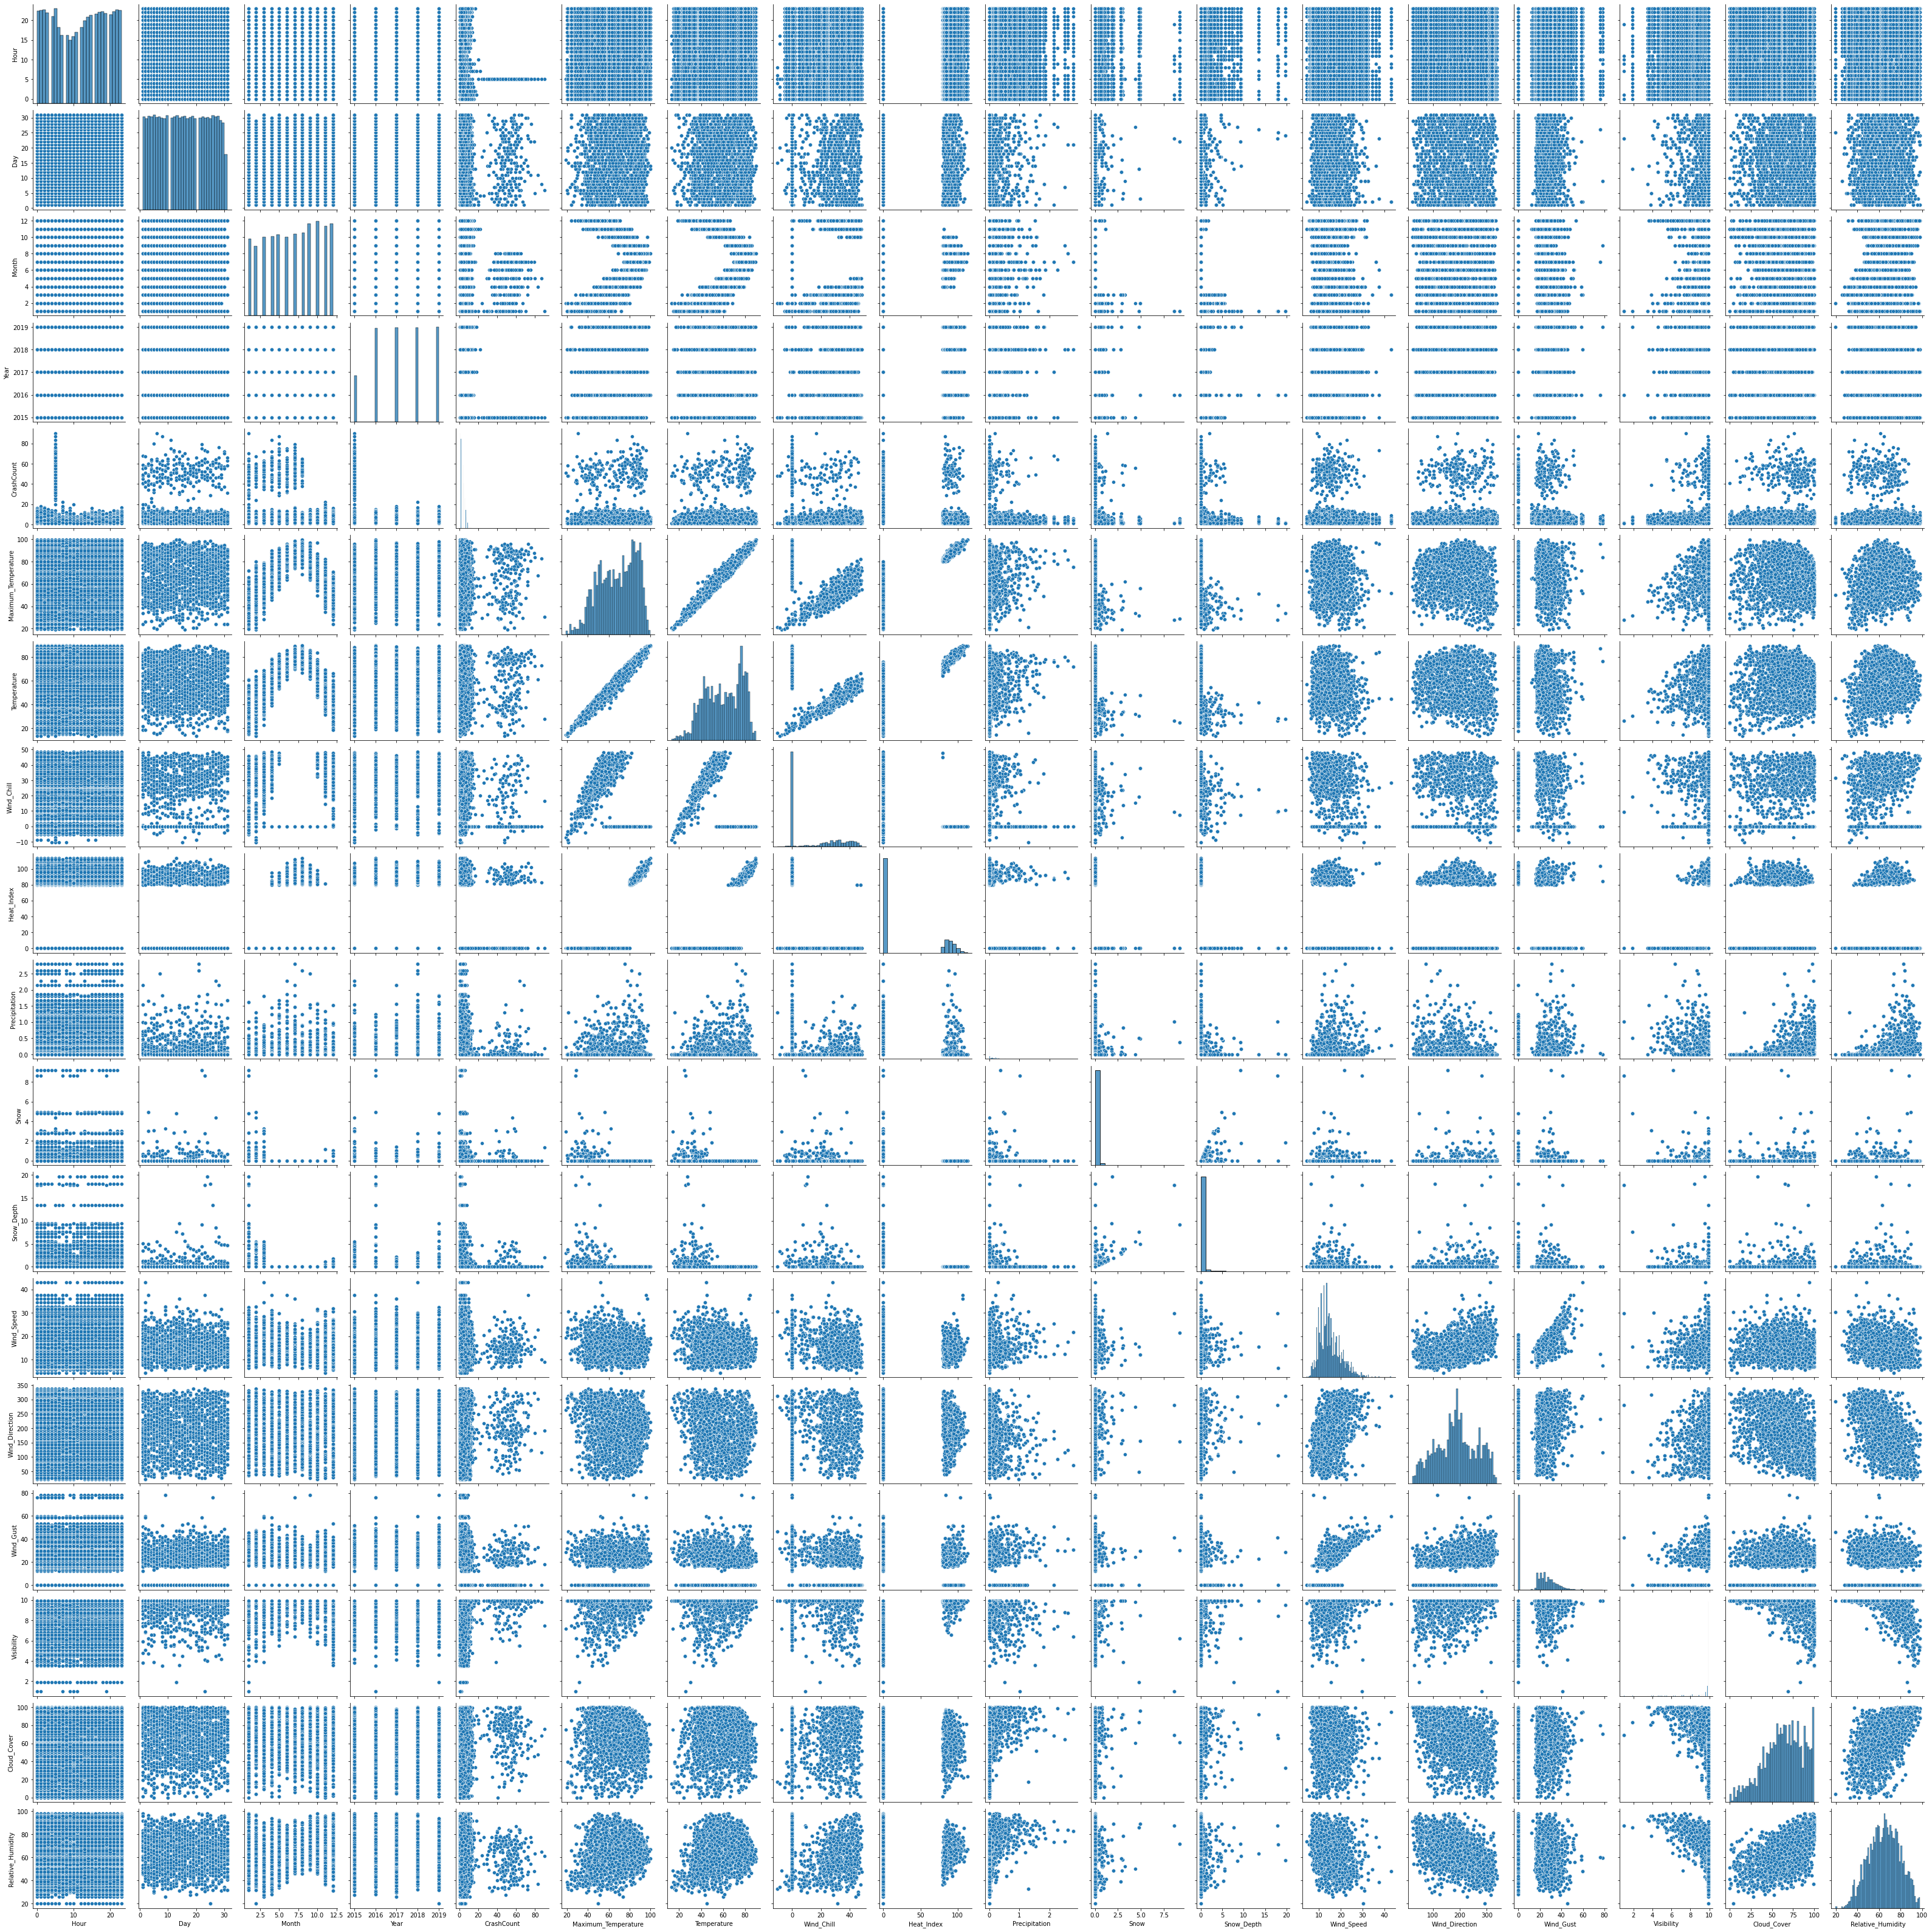

In [195]:
sns.pairplot(merged2)

Text(0.5, 1.0, 'Heatmap of Correlation Matrix')

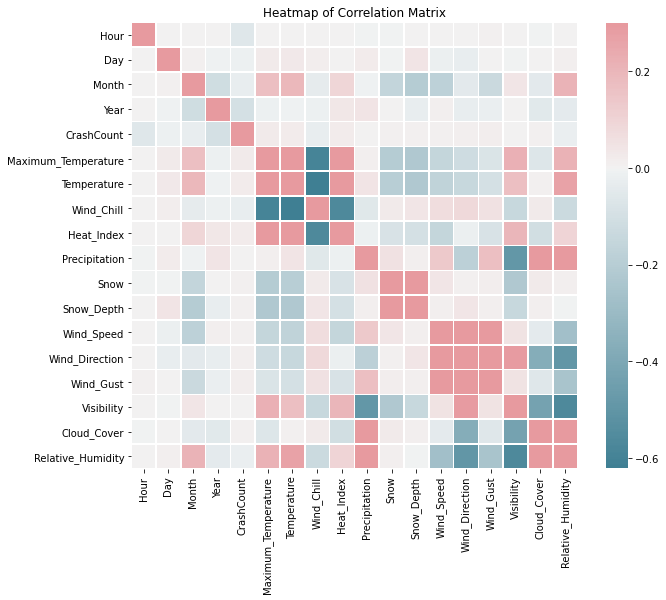

In [173]:
# Heatmap of features
corr = merged2.corr()
plt.figure(figsize = (10,10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .82})
plt.title('Heatmap of Correlation Matrix')

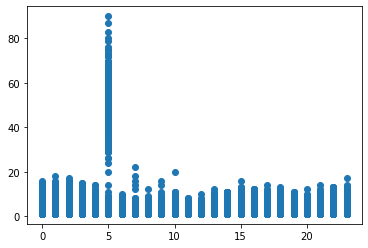

In [196]:
x= merged2['Hour']
y= merged2['CrashCount']
plt.scatter(x,y)

array([[<AxesSubplot:title={'center':'Hour'}>,
        <AxesSubplot:title={'center':'Day'}>,
        <AxesSubplot:title={'center':'Month'}>,
        <AxesSubplot:title={'center':'Year'}>],
       [<AxesSubplot:title={'center':'CrashCount'}>,
        <AxesSubplot:title={'center':'Maximum_Temperature'}>,
        <AxesSubplot:title={'center':'Temperature'}>,
        <AxesSubplot:title={'center':'Wind_Chill'}>],
       [<AxesSubplot:title={'center':'Heat_Index'}>,
        <AxesSubplot:title={'center':'Precipitation'}>,
        <AxesSubplot:title={'center':'Snow'}>,
        <AxesSubplot:title={'center':'Snow_Depth'}>],
       [<AxesSubplot:title={'center':'Wind_Speed'}>,
        <AxesSubplot:title={'center':'Wind_Direction'}>,
        <AxesSubplot:title={'center':'Wind_Gust'}>,
        <AxesSubplot:title={'center':'Visibility'}>],
       [<AxesSubplot:title={'center':'Cloud_Cover'}>,
        <AxesSubplot:title={'center':'Relative_Humidity'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=

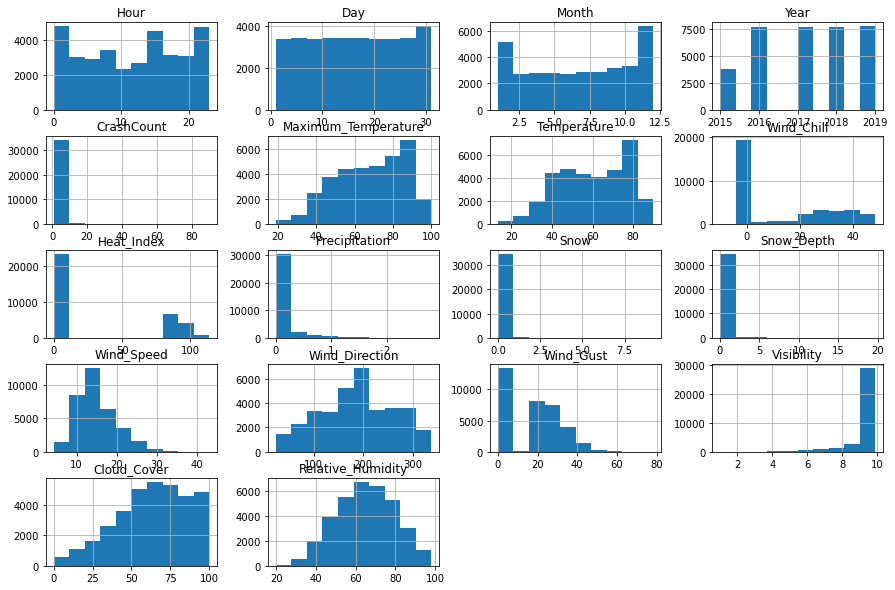

In [189]:
merged2.hist(figsize=(15, 10))

In [191]:
pd.scatter_matrix(merged2, alpha = 0.2, figsize = (6, 6), diagonal = 'kde')

AttributeError: module 'pandas' has no attribute 'scatter_matrix'

In [197]:
#export dataset to csv
merged2.to_csv('/Users/samuelclark/Documents/UMBC Data Science /Introduction to Data Science/Final Project/Data/merged.csv',
             index= False)

In [198]:
merged.groupby(['Hour']).agg({'CrashCount':'sum'})

CrashCount
Hour            
0           6956
1           7078
2           7413
3           6061
4           5000
5          16080
6           3004
7           2607
8           2550
9           2756
10          2534
11          2491
12          2743
13          4045
14          5488
15          5985
16          5735
17          5878
18          6213
19          5482
20          4472
21          5473
22          6328
23          6773